In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80) 
  
# data (as pandas dataframes) 
X = optical_recognition_of_handwritten_digits.data.features 
y = optical_recognition_of_handwritten_digits.data.targets 
  
# metadata 
print(optical_recognition_of_handwritten_digits.metadata) 
  
# variable information 
print(optical_recognition_of_handwritten_digits.variables) 


{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'ID': 280, 'type': 'NATIVE', 'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'venue': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, 

In [3]:
import pandas as pd 
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


In [9]:
def fitness(x_train, x_test, y_train, y_test, iterations=100):
    best_acc = -1
    best_params = None
    history = []

    for it in range(iterations):
        # randomly pick hyperparameters
        kernel = random.choice(["linear", "rbf", "poly", "sigmoid"])
        C = random.choice([0.1, 1, 10])
        gamma = random.choice(["scale", "auto"])

        model = SVC(kernel=kernel, C=C, gamma=gamma)
        model.fit(x_train, y_train)
        preds = model.predict(x_test)
        acc = accuracy_score(y_test, preds)

        history.append(acc)

        if acc > best_acc:
            best_acc = acc
            best_params = (kernel, C, gamma)

    return best_acc, best_params, history


In [11]:
# RUN 10 SAMPLES (S1–S10)

results = []
histories = []

for sample in range(1, 11):
    print(f"\nRunning Sample S{sample}")

    x_train, x_test, y_train, y_test = train_test_split(
        X, y, train_size=0.7, random_state=42 + sample
    )

    best_acc, best_params, history = fitness(x_train, x_test, y_train, y_test, 100)

    results.append((f"S{sample}", best_acc, best_params))
    histories.append(history)


Running Sample S1

Running Sample S2

Running Sample S3

Running Sample S4

Running Sample S5

Running Sample S6

Running Sample S7

Running Sample S8

Running Sample S9

Running Sample S10


In [13]:

# TABLE OUTPUT

df_results = pd.DataFrame(results, columns=["Sample", "Best Accuracy", "Best Parameters"])
print("\n\n===== TABLE 1: COMPARATIVE PERFORMANCE =====\n")
print(df_results)




===== TABLE 1: COMPARATIVE PERFORMANCE =====

  Sample  Best Accuracy   Best Parameters
0     S1       0.991108  (poly, 1, scale)
1     S2       0.989923  (rbf, 10, scale)
2     S3       0.990516  (poly, 1, scale)
3     S4       0.993480  (rbf, 10, scale)
4     S5       0.989330  (rbf, 10, scale)
5     S6       0.994665  (rbf, 10, scale)
6     S7       0.988737  (rbf, 10, scale)
7     S8       0.989923   (poly, 1, auto)
8     S9       0.987552  (poly, 10, auto)
9    S10       0.992294  (rbf, 10, scale)


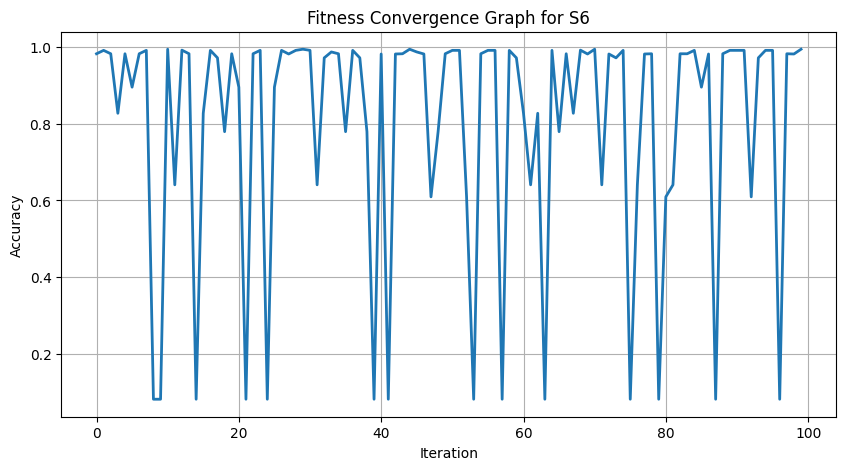

In [15]:
# PLOT CONVERGENCE OF BEST SAMPLE

best_index = np.argmax(df_results["Best Accuracy"])
best_sample = df_results.iloc[best_index]["Sample"]
best_history = histories[best_index]

plt.figure(figsize=(10, 5))
plt.plot(best_history, linewidth=2)
plt.title(f"Fitness Convergence Graph for {best_sample}")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()